In [4]:
!pip install stumpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np
import stumpy as sp
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from datetime import datetime

In [6]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
data=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ueba3/data.csv',index_col=0)
#data['date'] = pd.to_datetime(data['date_'])
#data=data.set_index(data['date'],drop=True)
data.head()

,deviceProduct,deviceVersion,signatureId,severity,name,start,rt,msg,shost,smac,dhost,dmac,suser,suid,externalId,cs1Label,cs1
deviceVendor,,,,,,,,,,,,,,,,,
Microsoft,Windows Vista,1,Microsoft-Windows-Security-Auditing:4662,3,An operation was performed on an object.,2022-06-07T08:02:24.725626Z,1654588945,An operation was performed on an object.,nmailand05-pc,58:91:CF:e5:2c:56,nmailand05-pc,58:91:CF:e5:2c:56,administrator,0x3030855,4662,payload,"{""SubjectUserName"": ""administrator"", ""AccessLi..."
Microsoft,Windows Server 2008,1,Microsoft-Windows-Security-Auditing:4662,3,An operation was performed on an object.,2022-06-07T08:02:26.386066Z,1654588946,An operation was performed on an object.,nmailand05-pc,58:91:CF:e5:2c:56,nmailand05-pc,58:91:CF:e5:2c:56,administrator,0x3030855,4662,payload,"{""SubjectUserName"": ""administrator"", ""AccessLi..."
Microsoft,Windows Vista,1,Microsoft-Windows-Security-Auditing:4662,3,An operation was performed on an object.,2022-06-07T08:02:30.310765Z,1654588950,An operation was performed on an object.,nmailand05-pc,58:91:CF:e5:2c:56,nmailand05-pc,58:91:CF:e5:2c:56,administrator,0x3030855,4662,payload,"{""SubjectUserName"": ""administrator"", ""AccessLi..."
Microsoft,Windows Vista,1,Microsoft-Windows-Security-Auditing:4898,3,Certificate Services loaded a template.,2022-06-07T08:02:36.212000Z,1654588956,Certificate Services loaded a template.,RHEL-2YB536UFG,00:E0:4C:ab:f2:02,varbënor-pc,B8:08:CF:26:80:ca,VArbënor,NaN,4898,payload,NaN
Microsoft,Windows Vista,1,Microsoft-Windows-Security-Auditing:4624,3,An account was successfully logged on.,2022-06-07T08:02:50.598000Z,1654588971,This event is generated when a logon session i...,FEDORA-EUT2SQ0ROPZ,00:16:76:81:ff:f9,w2012r2001-srv,00:E0:4C:c4:53:a4,FEDORA-EUT2SQ0ROPZ$,0x4f7f5b8,4624,payload,NaN


In [8]:
data =data.drop(['deviceProduct','deviceVersion','signatureId','name','rt','msg','shost','smac','dhost','dmac','suser','suid','externalId','cs1Label','cs1'],axis=1)
data.head()

,severity,start
deviceVendor,,
Microsoft,3,2022-06-07T08:02:24.725626Z
Microsoft,3,2022-06-07T08:02:26.386066Z
Microsoft,3,2022-06-07T08:02:30.310765Z
Microsoft,3,2022-06-07T08:02:36.212000Z
Microsoft,3,2022-06-07T08:02:50.598000Z


In [9]:
#from dateutil import parser
#item = []
#item = data['start']
#data['date'] = parser.parse(item)
#print(data['date'])

#data['date'] = datetime.strptime(data['start'],'%A %d %B %H:%M')

#data['date'] = pd.to_datetime(data['start'],format='%y%m%d')
#data=data.set_index(data['date'],drop=True)
#data.head()

In [10]:
data['date'] = pd.to_datetime(data['start'])

In [11]:
data['new_date_column'] = data['date'].dt.date

In [12]:
data['new_date_column']

deviceVendor
Microsoft    2022-06-07
Microsoft    2022-06-07
Microsoft    2022-06-07
Microsoft    2022-06-07
Microsoft    2022-06-07
                ...    
Microsoft    2022-06-08
Microsoft    2022-06-08
Microsoft    2022-06-08
Microsoft    2022-06-08
Microsoft    2022-06-08
Name: new_date_column, Length: 17939, dtype: object

In [13]:
data.head()

,severity,start,date,new_date_column
deviceVendor,,,,
Microsoft,3,2022-06-07T08:02:24.725626Z,2022-06-07 08:02:24.725626+00:00,2022-06-07
Microsoft,3,2022-06-07T08:02:26.386066Z,2022-06-07 08:02:26.386066+00:00,2022-06-07
Microsoft,3,2022-06-07T08:02:30.310765Z,2022-06-07 08:02:30.310765+00:00,2022-06-07
Microsoft,3,2022-06-07T08:02:36.212000Z,2022-06-07 08:02:36.212000+00:00,2022-06-07
Microsoft,3,2022-06-07T08:02:50.598000Z,2022-06-07 08:02:50.598000+00:00,2022-06-07


In [14]:
data=data.drop(['date','start'],axis=1)
data.head()

,severity,new_date_column
deviceVendor,,
Microsoft,3,2022-06-07
Microsoft,3,2022-06-07
Microsoft,3,2022-06-07
Microsoft,3,2022-06-07
Microsoft,3,2022-06-07


In [15]:
data=data.set_index(data['new_date_column'],drop=True)
data.head()

#data['freq']=df['severity']
#data=data.drop(['Pid','Date','date','LineId'],axis=1)

,severity,new_date_column
new_date_column,,
2022-06-07,3,2022-06-07
2022-06-07,3,2022-06-07
2022-06-07,3,2022-06-07
2022-06-07,3,2022-06-07
2022-06-07,3,2022-06-07


In [16]:
data['freq']=data['severity']
data=data.drop(['new_date_column','severity'],axis=1)
data.head()

,freq
new_date_column,
2022-06-07,3
2022-06-07,3
2022-06-07,3
2022-06-07,3
2022-06-07,3


In [17]:
data['freq']=data['freq'].astype(np.float64)
smp=sp.stump(data['freq'].values,100)
smp

array([[5.824531299806341, 8243, -1, 8243],
       [5.824531299806341, 8244, -1, 8244],
       [5.824531299806341, 8245, -1, 8245],
       ...,
       [6.126661400149131, 11219, 11219, -1],
       [7.747848575911098, 11220, 11220, -1],
       [7.747848575911098, 11221, 11221, -1]], dtype=object)

In [18]:
mp=np.argsort(smp[:,0])#return sorted indices 

In [19]:
smp[:,0]

array([5.824531299806341, 5.824531299806341, 5.824531299806341, ...,
       6.126661400149131, 7.747848575911098, 7.747848575911098],
      dtype=object)

In [20]:
mp

array([15481,  4532,  4533, ...,  2568,  2575,  6808])

In [21]:
motifs=[]
for i in range(5):
    motif=np.argsort(smp[:,0])[i]#smp[first_row:last_row,column_no]
    motifs.append(motif)

In [22]:
motifs

[15481, 4532, 4533, 4534, 16209]

In [23]:
neighbors=[]
for motif in motifs:
    neighbors.append(smp[motif,1])


In [24]:
neighbors

[16182, 7194, 7194, 7194, 16183]

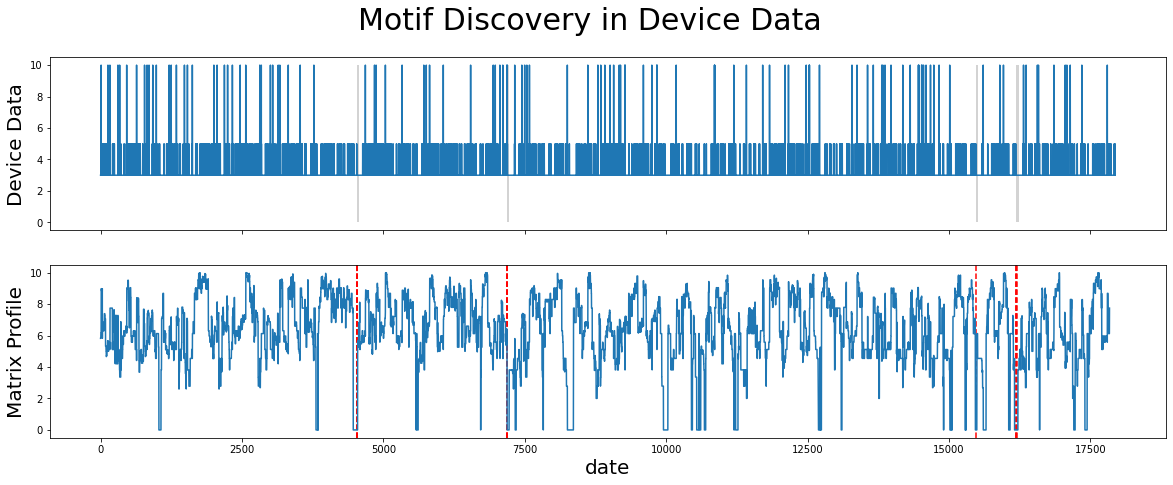

In [25]:
fig, axes=plt.subplots(2,figsize=(20,7),sharex=True)
fig.suptitle('Motif Discovery in Device Data', fontsize=30)
axes[0].plot(data['freq'].values)
axes[0].set_ylabel('Device Data',fontsize=20)
axes[1].set_ylabel('Matrix Profile',fontsize=20)
axes[1].set_xlabel('date',fontsize=20)

for i in range(5):
    rect = Rectangle((motifs[i], 0), 30, 10, facecolor='lightgrey')
    axes[0].add_patch(rect)
    rect = Rectangle((neighbors[i], 0), 30, 10, facecolor='lightgrey')
    axes[0].add_patch(rect)
    axes[1].axvline(x=motifs[i], linestyle="dashed",color='red')
    axes[1].axvline(x=neighbors[i], linestyle="dashed",color='red')
    
axes[1].plot(smp[:, 0])
plt.savefig('motif.png')



In [26]:
discords=[]
for i in range(1,6):
    discord=np.argsort(smp[:,0])[-i]#smp[first_row:last_row,column_no]
    discords.append(discord)
    

In [27]:
discords

[6808, 2575, 2568, 2569, 2570]

In [28]:
smp[discords,1]

array([7194, 4530, 4530, 4530, 4530], dtype=object)

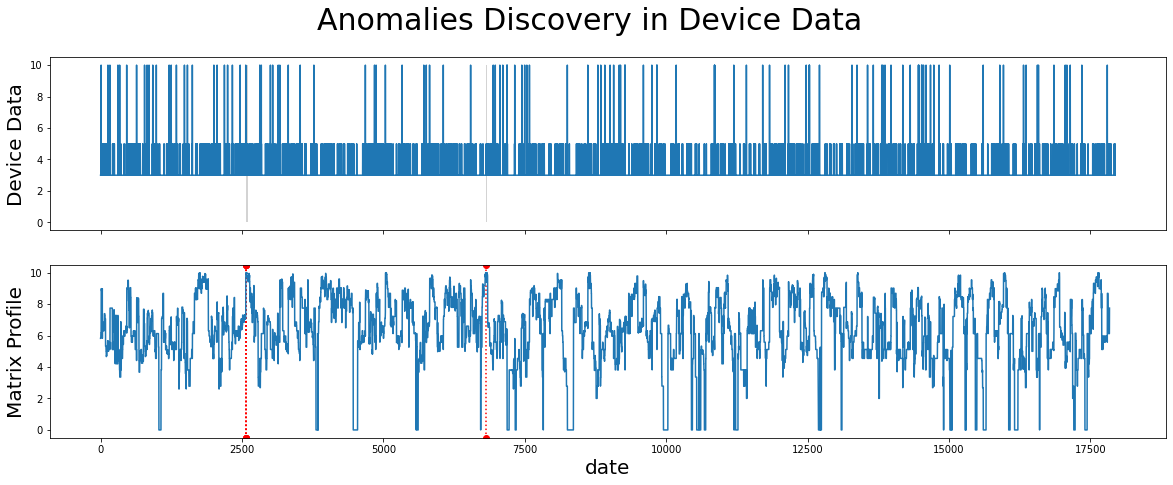

In [29]:
fig2, axes=plt.subplots(2,figsize=(20,7),sharex=True)
fig2.suptitle('Anomalies Discovery in Device Data', fontsize=30)
axes[0].plot(data['freq'].values)
axes[0].set_ylabel('Device Data',fontsize=20)
axes[1].set_ylabel('Matrix Profile',fontsize=20)
axes[1].set_xlabel('date',fontsize=20)



for i in range(5):
    rect = Rectangle((discords[i], 0), 30, 10, facecolor='lightgrey')
    axes[0].add_patch(rect)
    
    axes[1].axvline(x=discords[i],linestyle="dotted",color='red',marker='o') 
axes[1].plot(smp[:, 0])
plt.show()

Group by Time

In [30]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ueba3/data.csv',index_col=0)
df.head()

,deviceProduct,deviceVersion,signatureId,severity,name,start,rt,msg,shost,smac,dhost,dmac,suser,suid,externalId,cs1Label,cs1
deviceVendor,,,,,,,,,,,,,,,,,
Microsoft,Windows Vista,1,Microsoft-Windows-Security-Auditing:4662,3,An operation was performed on an object.,2022-06-07T08:02:24.725626Z,1654588945,An operation was performed on an object.,nmailand05-pc,58:91:CF:e5:2c:56,nmailand05-pc,58:91:CF:e5:2c:56,administrator,0x3030855,4662,payload,"{""SubjectUserName"": ""administrator"", ""AccessLi..."
Microsoft,Windows Server 2008,1,Microsoft-Windows-Security-Auditing:4662,3,An operation was performed on an object.,2022-06-07T08:02:26.386066Z,1654588946,An operation was performed on an object.,nmailand05-pc,58:91:CF:e5:2c:56,nmailand05-pc,58:91:CF:e5:2c:56,administrator,0x3030855,4662,payload,"{""SubjectUserName"": ""administrator"", ""AccessLi..."
Microsoft,Windows Vista,1,Microsoft-Windows-Security-Auditing:4662,3,An operation was performed on an object.,2022-06-07T08:02:30.310765Z,1654588950,An operation was performed on an object.,nmailand05-pc,58:91:CF:e5:2c:56,nmailand05-pc,58:91:CF:e5:2c:56,administrator,0x3030855,4662,payload,"{""SubjectUserName"": ""administrator"", ""AccessLi..."
Microsoft,Windows Vista,1,Microsoft-Windows-Security-Auditing:4898,3,Certificate Services loaded a template.,2022-06-07T08:02:36.212000Z,1654588956,Certificate Services loaded a template.,RHEL-2YB536UFG,00:E0:4C:ab:f2:02,varbënor-pc,B8:08:CF:26:80:ca,VArbënor,NaN,4898,payload,NaN
Microsoft,Windows Vista,1,Microsoft-Windows-Security-Auditing:4624,3,An account was successfully logged on.,2022-06-07T08:02:50.598000Z,1654588971,This event is generated when a logon session i...,FEDORA-EUT2SQ0ROPZ,00:16:76:81:ff:f9,w2012r2001-srv,00:E0:4C:c4:53:a4,FEDORA-EUT2SQ0ROPZ$,0x4f7f5b8,4624,payload,NaN


In [31]:
df =df.drop(['deviceProduct','deviceVersion','signatureId','name','rt','msg','shost','smac','dhost','dmac','suser','suid','externalId','cs1Label','cs1'],axis=1)
df.head()

,severity,start
deviceVendor,,
Microsoft,3,2022-06-07T08:02:24.725626Z
Microsoft,3,2022-06-07T08:02:26.386066Z
Microsoft,3,2022-06-07T08:02:30.310765Z
Microsoft,3,2022-06-07T08:02:36.212000Z
Microsoft,3,2022-06-07T08:02:50.598000Z


In [32]:
df['date'] = pd.to_datetime(df['start'])
df['new_date'] = df['date'].dt.date
df['time'] = df['date'].dt.time

In [33]:
df['time']

deviceVendor
Microsoft    08:02:24.725626
Microsoft    08:02:26.386066
Microsoft    08:02:30.310765
Microsoft    08:02:36.212000
Microsoft    08:02:50.598000
                  ...       
Microsoft    23:59:04.282000
Microsoft    23:59:18.668000
Microsoft    23:59:19.668000
Microsoft    23:59:33.054000
Microsoft    23:59:47.440000
Name: time, Length: 17939, dtype: object

In [34]:
df['hour'] = df['date'].dt.hour
df['hour']

deviceVendor
Microsoft     8
Microsoft     8
Microsoft     8
Microsoft     8
Microsoft     8
             ..
Microsoft    23
Microsoft    23
Microsoft    23
Microsoft    23
Microsoft    23
Name: hour, Length: 17939, dtype: int64

In [35]:
df.head()

,severity,start,date,new_date,time,hour
deviceVendor,,,,,,
Microsoft,3,2022-06-07T08:02:24.725626Z,2022-06-07 08:02:24.725626+00:00,2022-06-07,08:02:24.725626,8
Microsoft,3,2022-06-07T08:02:26.386066Z,2022-06-07 08:02:26.386066+00:00,2022-06-07,08:02:26.386066,8
Microsoft,3,2022-06-07T08:02:30.310765Z,2022-06-07 08:02:30.310765+00:00,2022-06-07,08:02:30.310765,8
Microsoft,3,2022-06-07T08:02:36.212000Z,2022-06-07 08:02:36.212000+00:00,2022-06-07,08:02:36.212000,8
Microsoft,3,2022-06-07T08:02:50.598000Z,2022-06-07 08:02:50.598000+00:00,2022-06-07,08:02:50.598000,8


In [36]:
df=df.set_index(['new_date','hour']).sort_index()
df.head()

severity                        start  \
new_date   hour                                          
2022-06-07 8            3  2022-06-07T08:02:24.725626Z   
           8            3  2022-06-07T08:02:26.386066Z   
           8            3  2022-06-07T08:02:30.310765Z   
           8            3  2022-06-07T08:02:36.212000Z   
           8            3  2022-06-07T08:02:50.598000Z   

                                            date             time  
new_date   hour                                                    
2022-06-07 8    2022-06-07 08:02:24.725626+00:00  08:02:24.725626  
           8    2022-06-07 08:02:26.386066+00:00  08:02:26.386066  
           8    2022-06-07 08:02:30.310765+00:00  08:02:30.310765  
           8    2022-06-07 08:02:36.212000+00:00  08:02:36.212000  
           8    2022-06-07 08:02:50.598000+00:00  08:02:50.598000

In [37]:
df['freq']=df['severity']
df=df.drop(['severity','start','date','time'],axis=1)

In [38]:
df.head()

freq
new_date   hour      
2022-06-07 8        3
           8        3
           8        3
           8        3
           8        3

In [39]:
df['freq']=df['freq'].astype(np.float64)

In [40]:
m=8*7
smp=sp.stump(df['freq'].values,m)

In [41]:
smp

array([[3.308743233076969, 8243, -1, 8243],
       [3.308743233076969, 8244, -1, 8244],
       [3.308743233076969, 8245, -1, 8245],
       ...,
       [9.72122337239986e-07, 17418, 17418, -1],
       [3.5262583393452264e-07, 11329, 11329, -1],
       [3.5262583393452264e-07, 11330, 11330, -1]], dtype=object)

In [42]:
mp=np.argsort(smp[:,0])#return sorted indices 

In [43]:
smp[:,0]

array([3.308743233076969, 3.308743233076969, 3.308743233076969, ...,
       9.72122337239986e-07, 3.5262583393452264e-07,
       3.5262583393452264e-07], dtype=object)

In [44]:
mp

array([ 9987, 14749, 14750, ...,  1865, 16008, 16009])

In [45]:
motifs=[]
for i in range(5):
    motif=np.argsort(smp[:,0])[i]#smp[first_row:last_row,column_no]
    motifs.append(motif)

In [46]:
motifs

[9987, 14749, 14750, 14751, 14752]

In [47]:
neighbors=[]
for motif in motifs:
    neighbors.append(smp[motif,1])


In [48]:
neighbors

[10002, 14764, 14765, 14736, 14737]

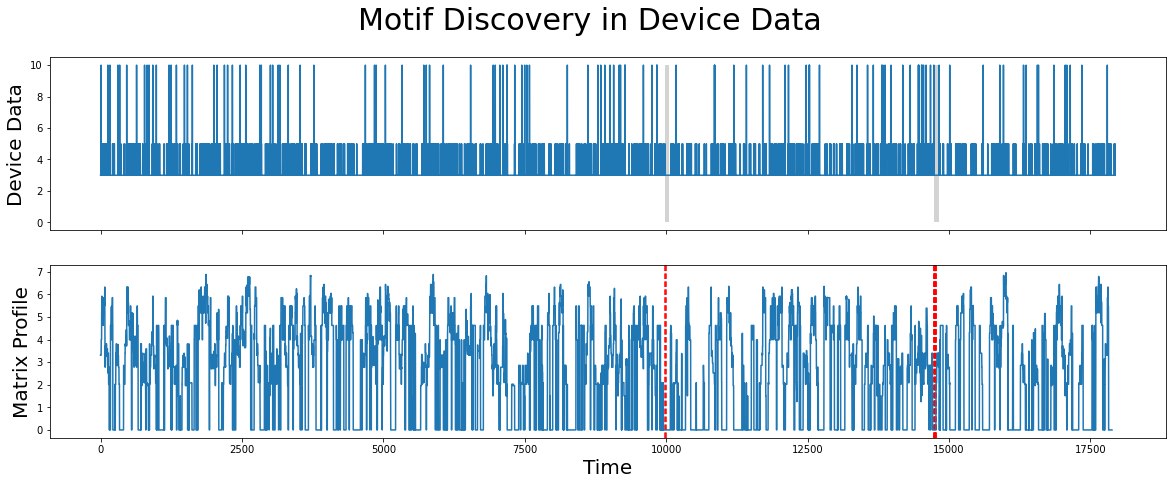

In [49]:
fig, axes=plt.subplots(2,figsize=(20,7),sharex=True)
fig.suptitle('Motif Discovery in Device Data', fontsize=30)
axes[0].plot(df['freq'].values)
axes[0].set_ylabel('Device Data',fontsize=20)
axes[1].set_ylabel('Matrix Profile',fontsize=20)
axes[1].set_xlabel('Time',fontsize=20)



for i in range(5):
    rect = Rectangle((motifs[i], 0), m, 10, facecolor='lightgrey')
    axes[0].add_patch(rect)
    rect = Rectangle((neighbors[i], 0), m, 10, facecolor='lightgrey')
    axes[0].add_patch(rect)
    axes[1].axvline(x=motifs[i], linestyle="dashed",color='red')
    axes[1].axvline(x=neighbors[i], linestyle="dashed",color='red')
    
axes[1].plot(smp[:, 0])
plt.show()

In [50]:
discords=[]
for i in range(1,6):
    discord=np.argsort(smp[:,0])[-i]#smp[first_row:last_row,column_no]
    discords.append(discord)
# i=0 
# np.argsort(smp[:,0])[-i]

In [51]:
discords

[16009, 16008, 1865, 5883, 3711]

16009
16008
1865
5883
3711


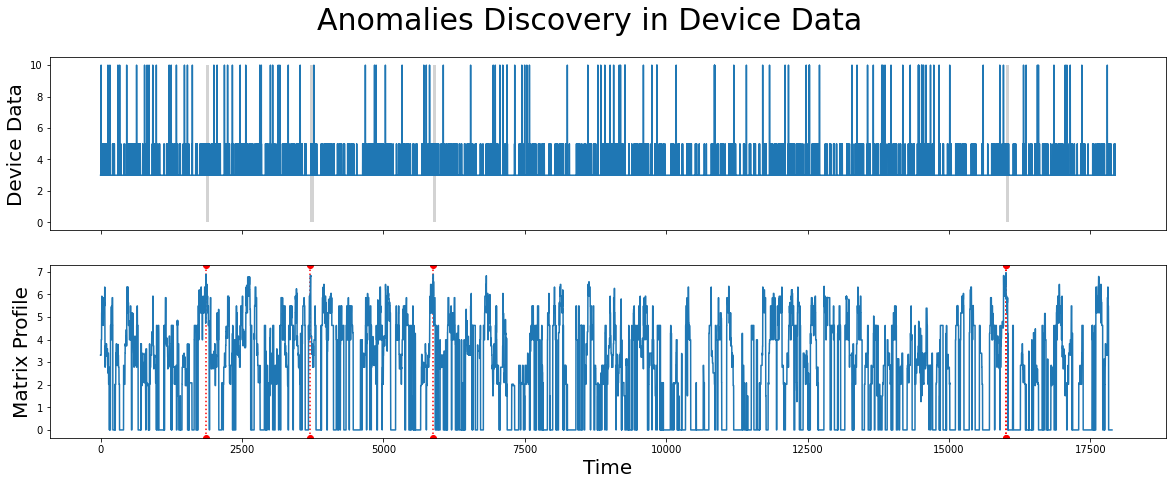

In [52]:
fig2, axes=plt.subplots(2,figsize=(20,7),sharex=True)
fig2.suptitle('Anomalies Discovery in Device Data', fontsize=30)
axes[0].plot(df['freq'].values)
axes[0].set_ylabel('Device Data',fontsize=20)
axes[1].set_ylabel('Matrix Profile',fontsize=20)
axes[1].set_xlabel('Time',fontsize=20)


color=['red','yellow','black']
for i in range(5):
    print(discords[i])
    rect = Rectangle((discords[i], 0), m, 10, facecolor='lightgrey')
    axes[0].add_patch(rect)
    
    axes[1].axvline(x=discords[i],linestyle="dotted",color='red',marker='o') 
    
axes[1].plot(smp[:, 0])
plt.show()

In [53]:
!pip install matrixprofile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import matrixprofile as mp

In [55]:
mph=mp.compute(df['freq'].values,8*7)

[<Figure size 1080x504 with 2 Axes>]

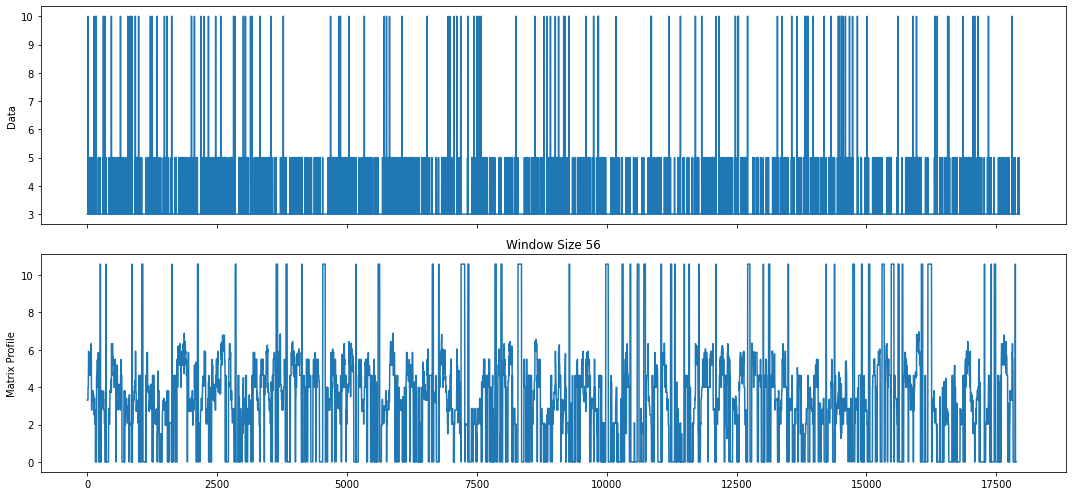

In [56]:
mp.visualize(mph)

[<Figure size 1080x504 with 2 Axes>,
 <Figure size 1080x504 with 6 Axes>,
 <Figure size 1080x504 with 3 Axes>]

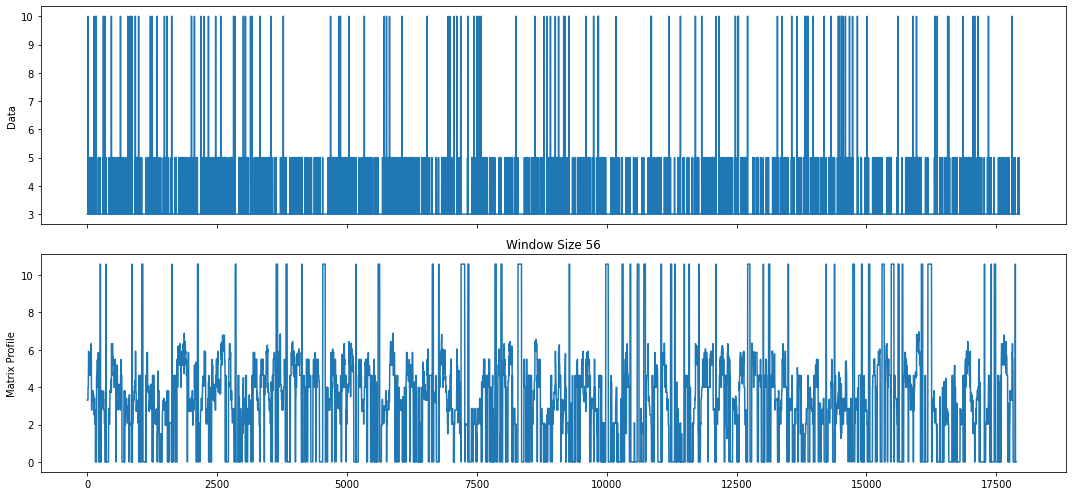

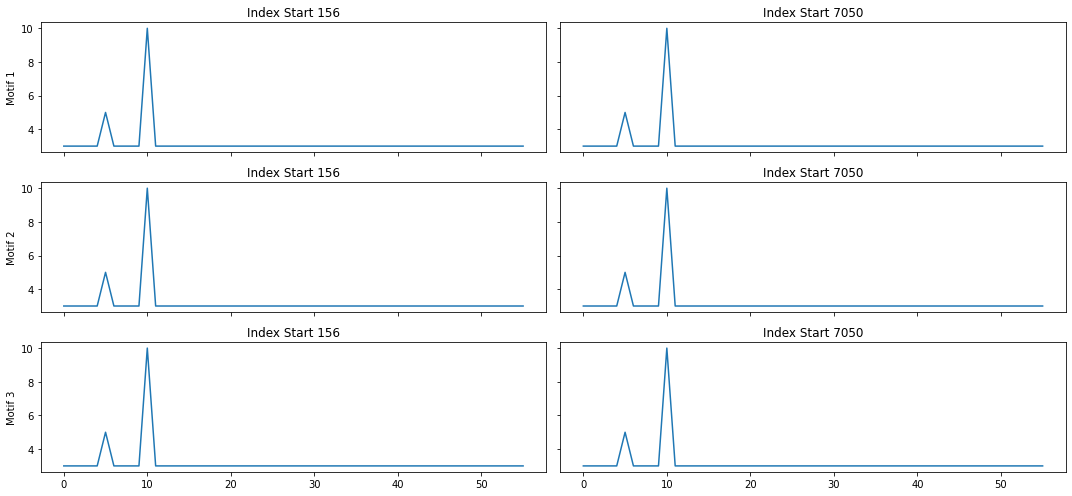

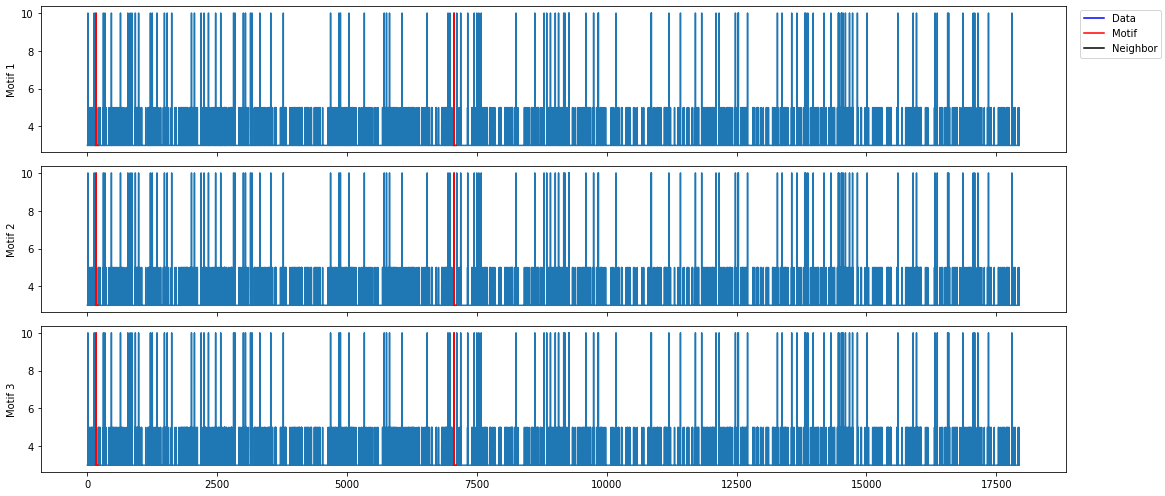

In [57]:
mp.visualize(mp.discover.motifs(mph))

/usr/local/lib/python3.7/dist-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


[<Figure size 1080x504 with 2 Axes>,
 <Figure size 1080x504 with 6 Axes>,
 <Figure size 1080x504 with 3 Axes>,
 <Figure size 1080x504 with 4 Axes>]

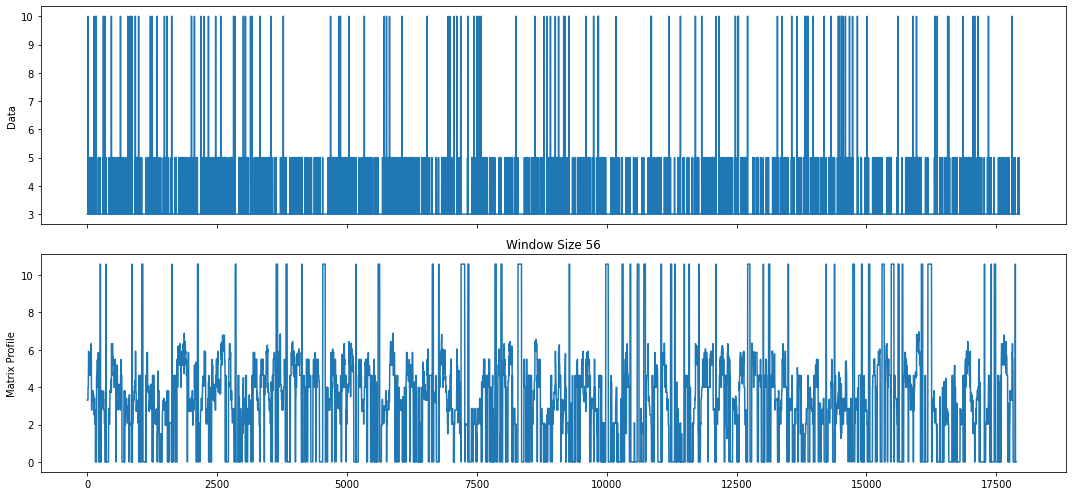

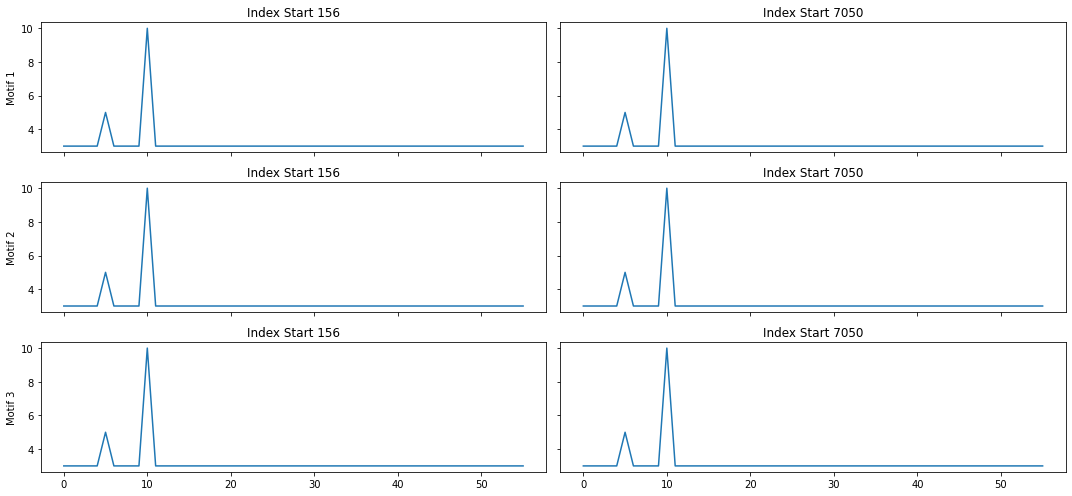

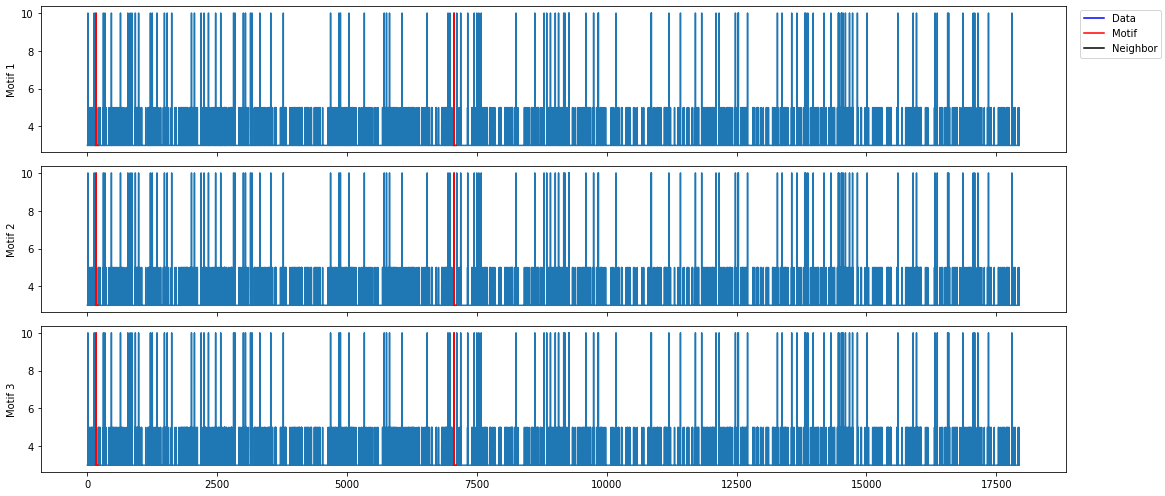

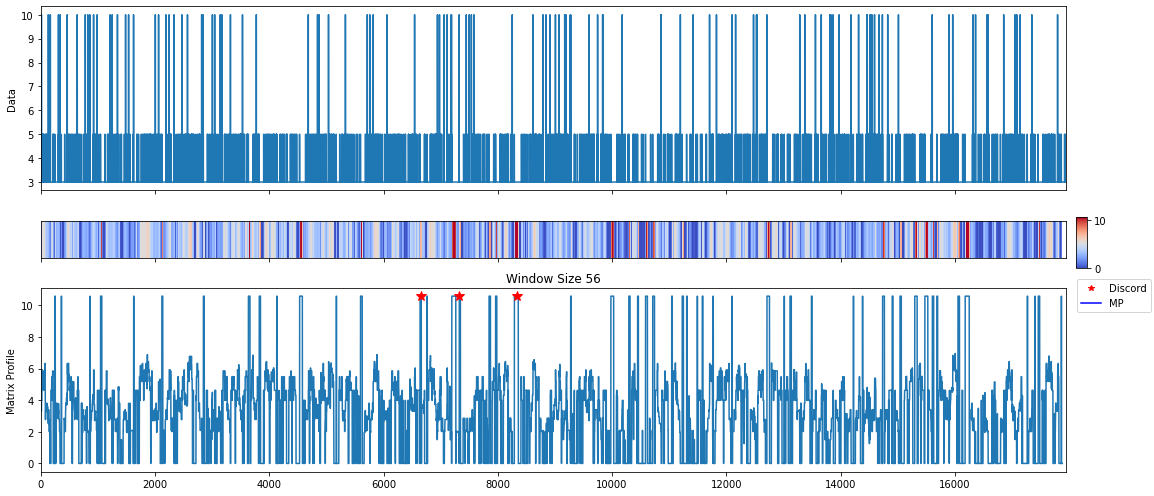

In [58]:
mp.visualize(mp.discover.discords(mph))

/usr/local/lib/python3.7/dist-packages/matrixprofile/visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/usr/local/lib/python3.7/dist-packages/matrixprofile/visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/usr/local/lib/python3.7/dist-packages/matrixprofile/visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


({'pmp': array([[4.00000000e+00, 4.00000000e+00, 4.00000000e+00, ...,
                     inf,            inf,            inf],
         [4.24264069e+00, 4.24264069e+00, 0.00000000e+00, ...,
                     inf,            inf,            inf],
         [4.47213595e+00, 6.66400187e-08, 0.00000000e+00, ...,
                     inf,            inf,            inf],
         ...,
         [9.23541946e+00, 9.23541946e+00, 9.23541946e+00, ...,
                     inf,            inf,            inf],
         [9.26425123e+00, 9.26425123e+00, 9.26425123e+00, ...,
                     inf,            inf,            inf],
         [9.29299453e+00, 9.29299453e+00, 9.29299453e+00, ...,
                     inf,            inf,            inf]]),
  'pmpi': array([[                   3,                    4,                    5,
          ..., -9223372036854775808, -9223372036854775808,
          -9223372036854775808],
         [                   4,                    5,                

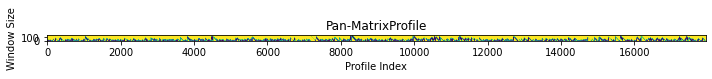

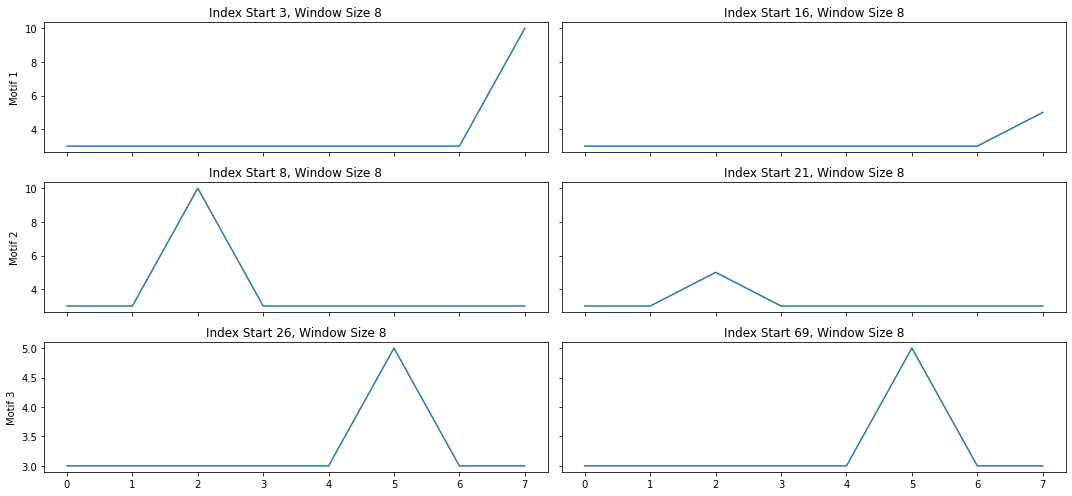

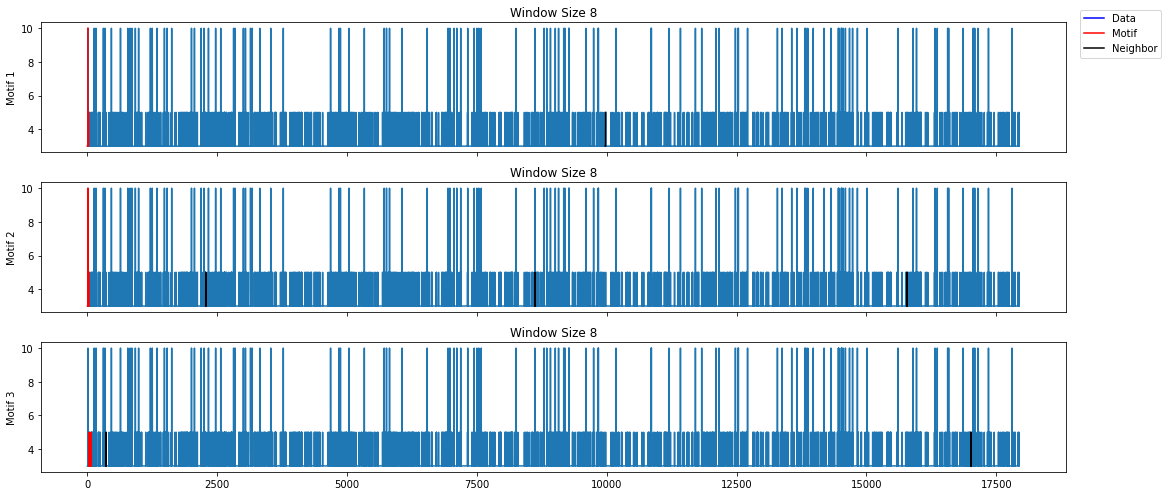

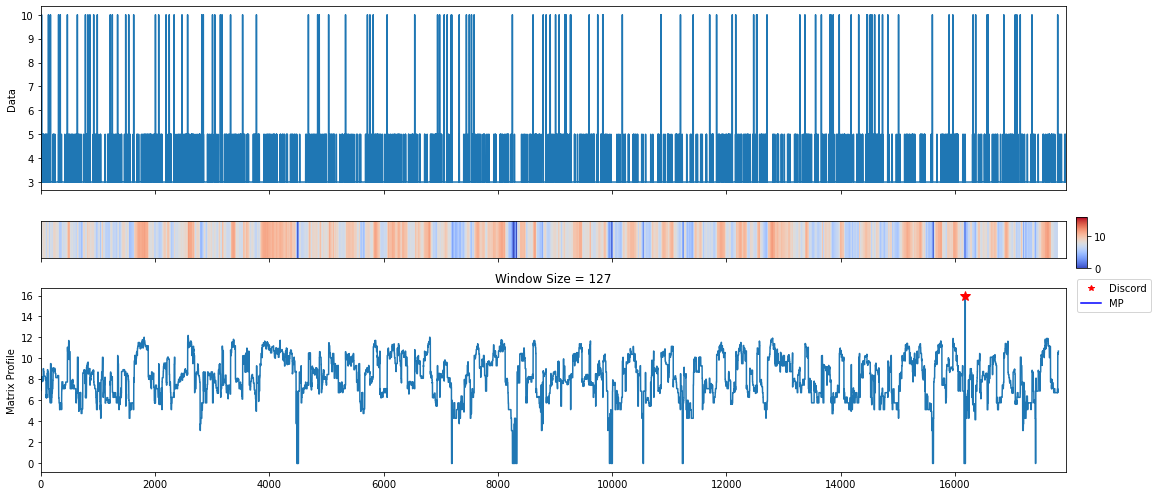

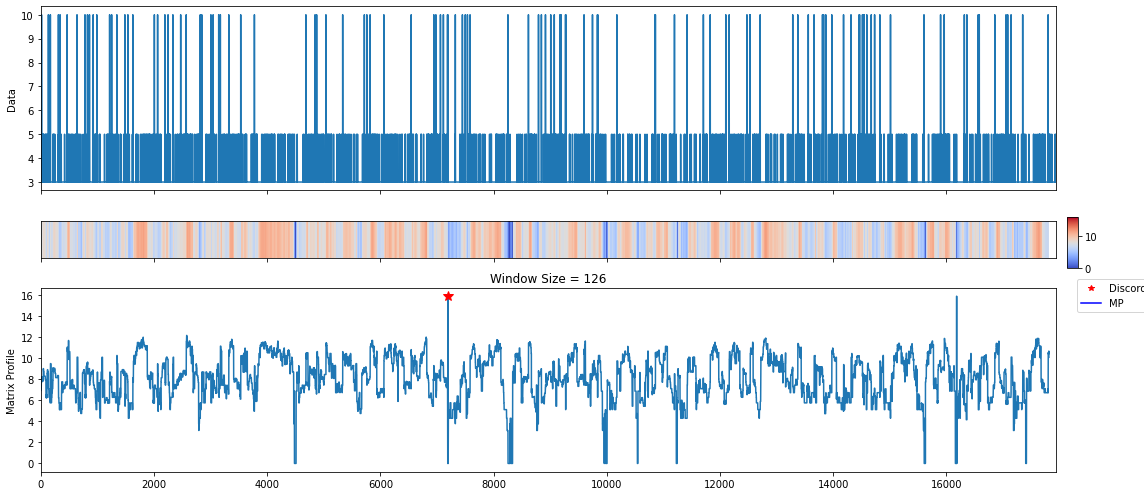

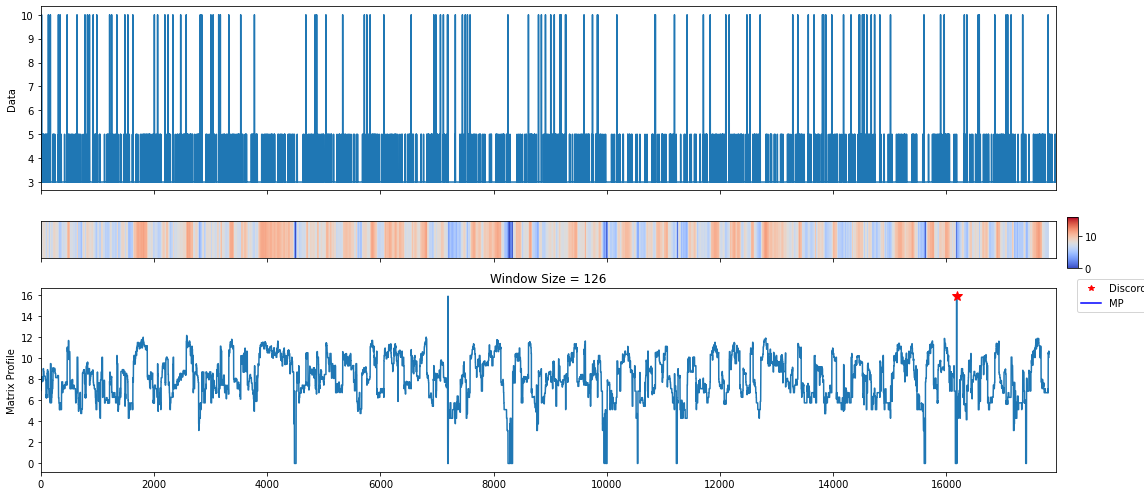

In [60]:
mp.analyze(df['freq'].values)